# Project 2 # 

## Exploring Car Acceptability Prediction with Decision Trees and Random Forests ##

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## Loading the Dataset ##

In [4]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv(url, names=columns)

In [5]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Data Prep ##

In [7]:
# Encode categorical variables
data = df.copy()
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# Features and target
X = data.drop("class", axis=1)
y = data["class"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Exploratory Data Analysis ##

In [9]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Data types and null values
df.info()

# Summary statistics
df.describe(include="all")

Dataset shape: (1728, 7)
Columns: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_92994/3089075245.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="Set2")


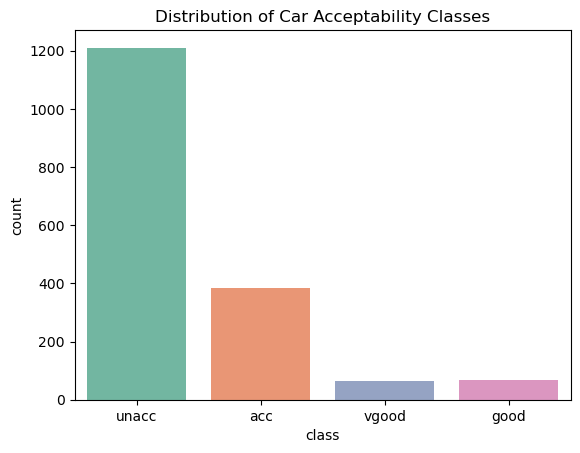

In [10]:
sns.countplot(x="class", data=df, palette="Set2")
plt.title("Distribution of Car Acceptability Classes")
plt.show()

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_92994/2917268195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


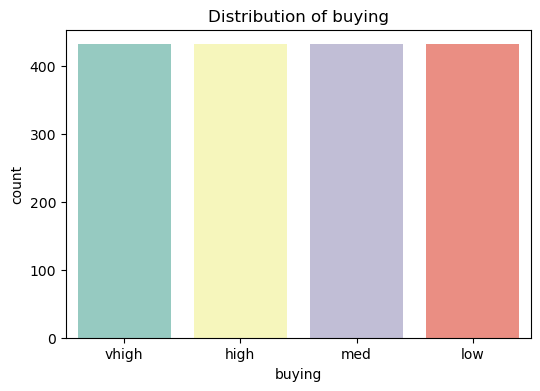

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_92994/2917268195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


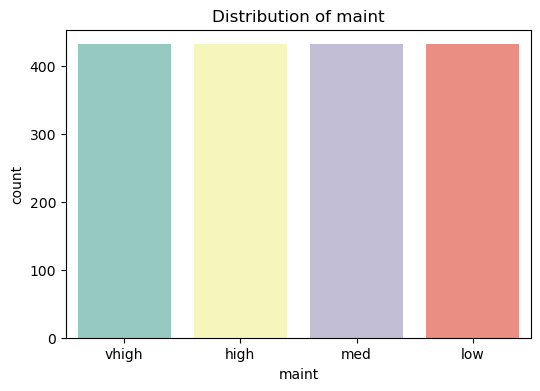

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_92994/2917268195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


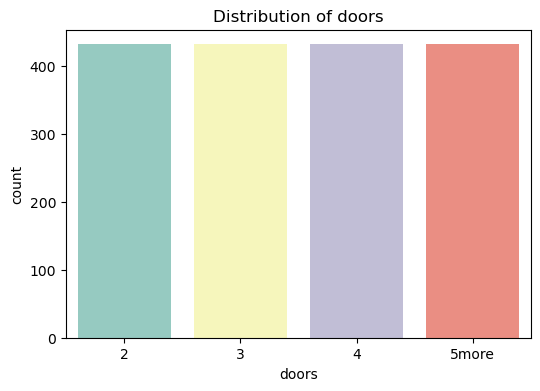

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_92994/2917268195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


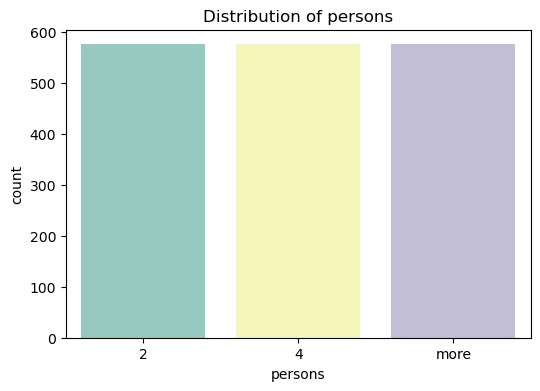

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_92994/2917268195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


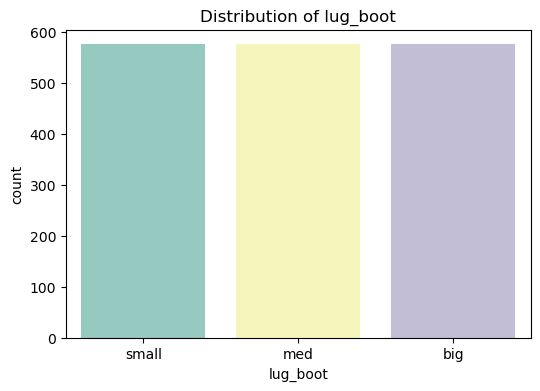

/var/folders/md/_scc2rxd2q177sjc1pgjfyt00000gn/T/ipykernel_92994/2917268195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


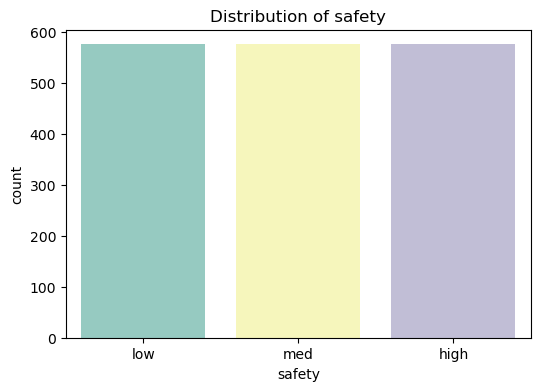

In [11]:
categorical_features = df.columns[:-1]  # all except class

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set3")
    plt.title(f"Distribution of {col}")
    plt.show()

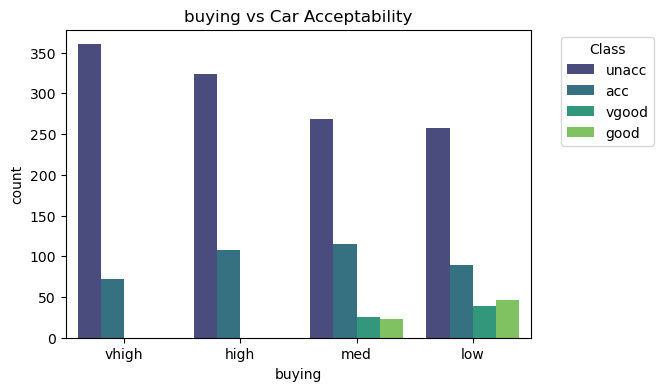

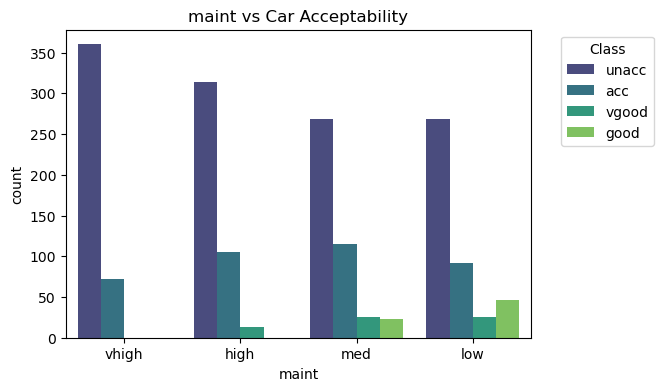

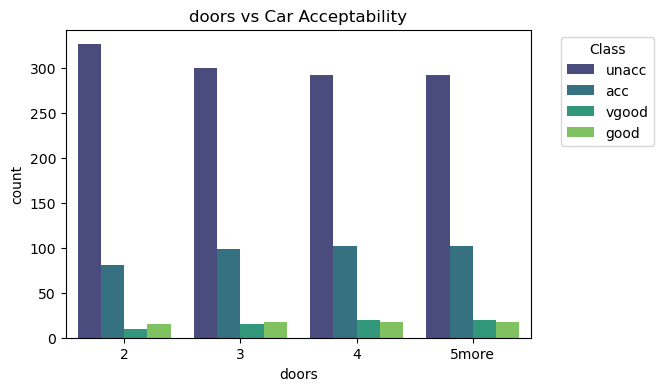

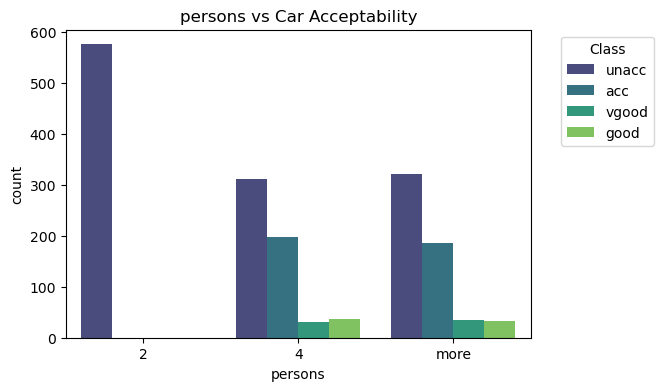

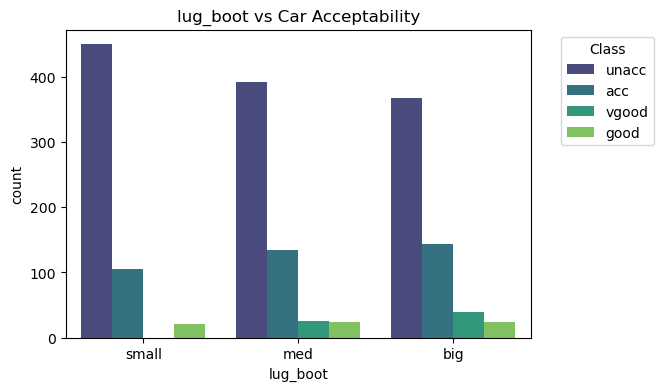

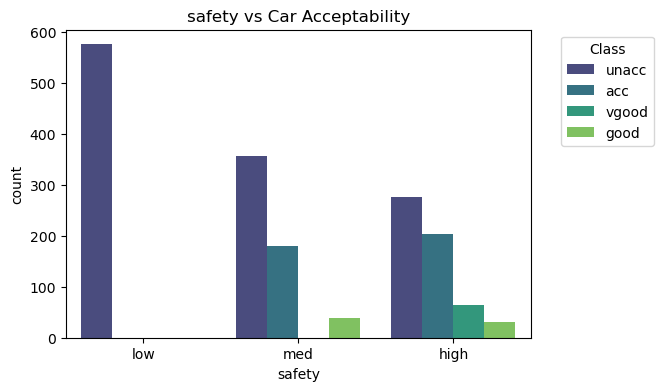

In [12]:
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="class", data=df, palette="viridis")
    plt.title(f"{col} vs Car Acceptability")
    plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

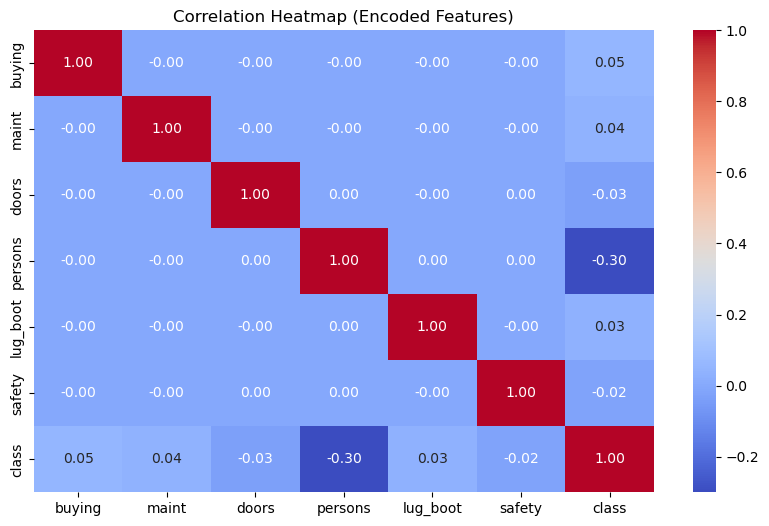

In [13]:
df_encoded = df.copy()
for col in df_encoded.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()

## Feature Importance - Decision Tree ##

Decision Tree Results
Accuracy: 0.9788053949903661
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.91      1.00      0.95        21
           2       1.00      0.98      0.99       363
           3       1.00      0.95      0.97        20

    accuracy                           0.98       519
   macro avg       0.96      0.98      0.97       519
weighted avg       0.98      0.98      0.98       519



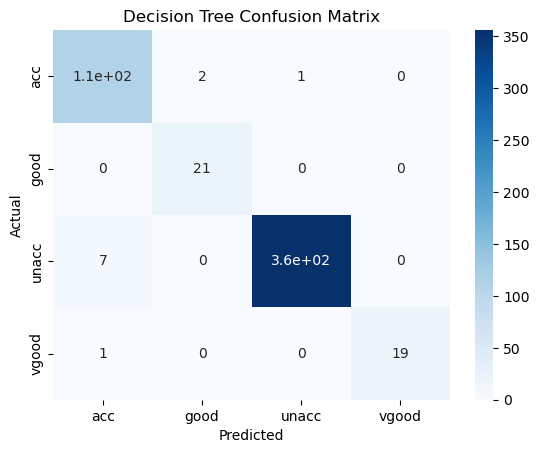

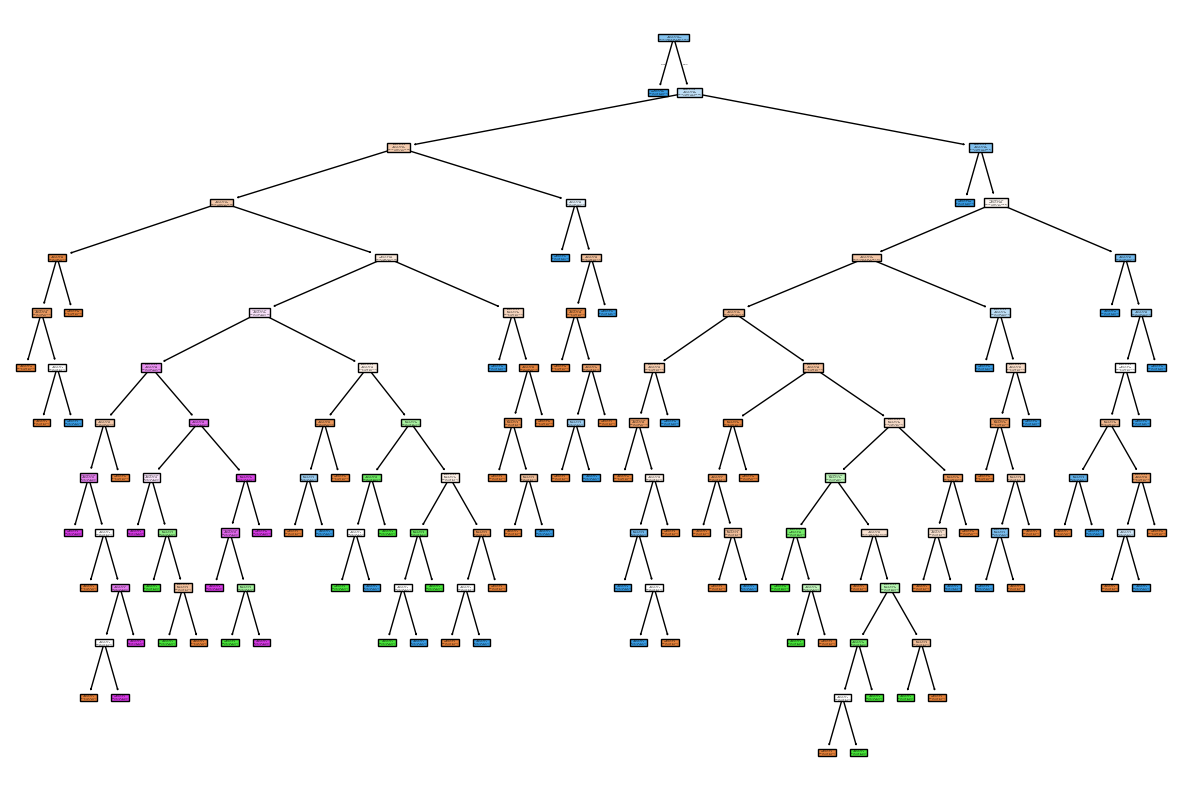

In [25]:
# Train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Visualize tree (optional, may be large)
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

## Feature Importance - Random Forest ##

Random Forest Results
Accuracy: 0.9672447013487476
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       115
           1       0.90      0.90      0.90        21
           2       0.98      0.98      0.98       363
           3       1.00      0.95      0.97        20

    accuracy                           0.97       519
   macro avg       0.95      0.94      0.95       519
weighted avg       0.97      0.97      0.97       519



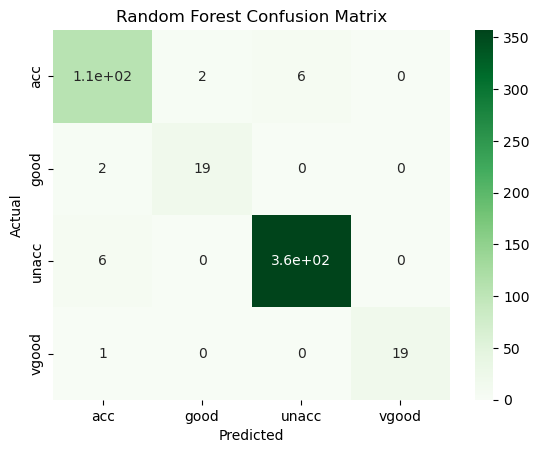

In [28]:
# Train
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

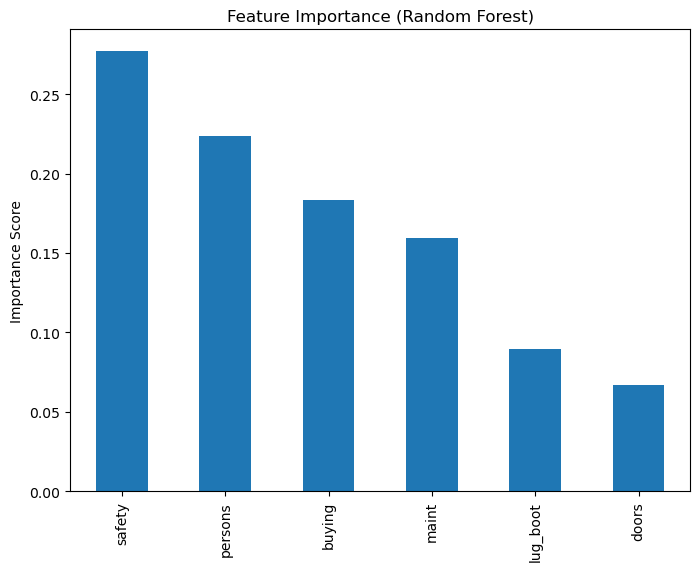

In [30]:
# Feature importance
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot
feat_importances.plot(kind="bar", figsize=(8, 6))
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

Decision Tree Accuracy: 0.9788053949903661
Random Forest Accuracy: 0.9672447013487476

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.91      1.00      0.95        21
           2       1.00      0.98      0.99       363
           3       1.00      0.95      0.97        20

    accuracy                           0.98       519
   macro avg       0.96      0.98      0.97       519
weighted avg       0.98      0.98      0.98       519


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       115
           1       0.90      0.90      0.90        21
           2       0.98      0.98      0.98       363
           3       1.00      0.95      0.97        20

    accuracy                           0.97       519
   macro avg       0.95      0.94      0.95       519
weighted avg       0.

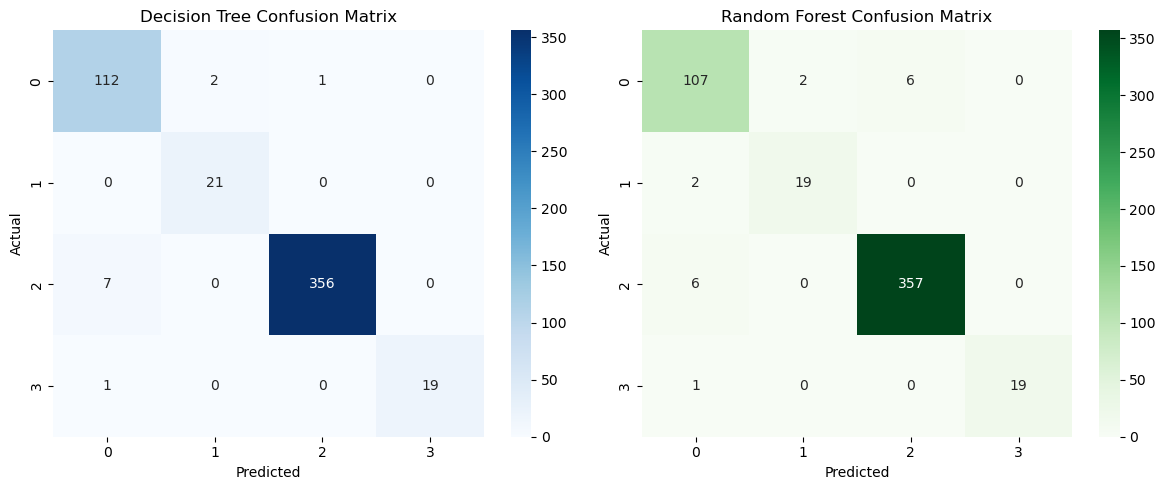

In [32]:
# Predictions
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Classification Reports
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_preds))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()